# Notebook to work with Altimetry and Lake Surface Area

In [1]:
% matplotlib inline
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy
import numpy as np
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['font.size'] = 14

In [2]:
GRLM = "/home2/svimal/Github/Nina/data/lake_610/610_GRLM10.txt"; print GRLM
MODIS = "/home2/svimal/Github/Nina/data/lake_610/MODIS_dates_and_241_area.txt"; print MODIS
df_grlm = pd.read_csv(GRLM, skiprows=43, delim_whitespace=True, names="mission,cycle,date,hour,minute,lake_height,error,mean(decibels),IonoCorrection,TropCorrection".split(","), engine='python', index_col=False)
df_grlm.head(5)

/home2/svimal/Github/Nina/data/lake_610/610_GRLM10.txt
/home2/svimal/Github/Nina/data/lake_610/MODIS_dates_and_241_area.txt


,mission,cycle,date,hour,minute,lake_height,error,mean(decibels),IonoCorrection,TropCorrection
0,OSTM,1,20080716,5,21,-0.22,0.043,16.78,AMR,GIM
1,OSTM,2,20080726,3,20,-0.25,0.043,16.04,AMR,GIM
2,OSTM,3,20080805,1,18,-0.25,0.052,12.90,AMR,GIM
3,OSTM,4,20080814,23,17,-0.42,0.043,13.55,AMR,GIM
4,OSTM,5,20080824,21,15,-0.38,0.069,33.14,AMR,GIM


### GRLM Altimetry data from July 22 2008 to September 3, 2016
Create new columns of year, month, day in a convenient format

In [3]:
df_grlm = pd.read_csv(GRLM, skiprows=43, delim_whitespace=True, names="mission,cycle,date,hour,minute,lake_height,error,mean(decibels),IonoCorrection,TropCorrection".split(","), engine='python', index_col=False)
def get_year(date): return int(str(date)[0:4])
def get_month(date): return int(str(date)[4:6])
def get_day(date): return int(str(date)[6:])
df_grlm['year'] = df_grlm['date'].apply(get_year)
df_grlm['month'] = df_grlm['date'].apply(get_month)
df_grlm['day'] = df_grlm['date'].apply(get_day)
df_grlm = df_grlm.where(df_grlm.minute < 61 ) # remove lines that do not have time
df_grlm = df_grlm.where(df_grlm.lake_height < 900 ) # remove entries that do not have lake-height

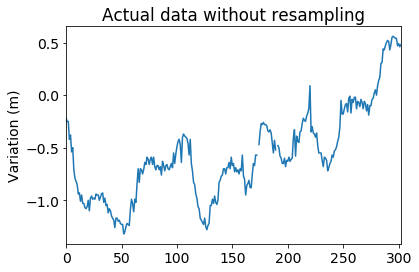

In [4]:
df_grlm.lake_height.plot(); plt.title("Actual data without resampling"); plt.ylabel("Variation (m)")

### Interpolate the missing data points

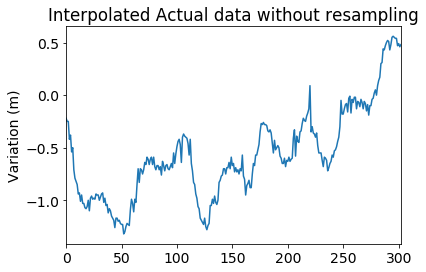

In [5]:
df_grlm.lake_height.interpolate().plot(); plt.title("Interpolated Actual data without resampling"); plt.ylabel("Variation (m)")

### Add time information to the dataframe

In [6]:
df = df_grlm
df[["year", "month", "day", "hour", "minute"]] = df[["year", "month", "day", "hour", "minute"]].fillna(0).astype(int)
df['Time'] = df.year.astype(str).str.cat(df.month.astype(str).astype(str), sep='-').str.cat(df.day.astype(str), sep='-')\
                .str.cat(df.hour.astype(str).astype(str), sep='-').str.cat(df.minute.astype(str).astype(str), sep='-')
df = df.where(df.year>10) # to ger rid of all the nan values
df.index = pd.to_datetime(pd.Series(df["Time"]), format="%Y-%m-%d-%H-%M"); 
print df.index[0:3], df.index[-3:]

DatetimeIndex(['2008-07-16 05:21:00', '2008-07-26 03:20:00',
               '2008-08-05 01:18:00'],
              dtype='datetime64[ns]', name=u'Time', freq=None) DatetimeIndex(['2016-09-06 21:59:00', '2016-09-16 19:58:00',
               '2016-09-26 17:56:00'],
              dtype='datetime64[ns]', name=u'Time', freq=None)


### Resample the data to get monthly and annual variation in lake height

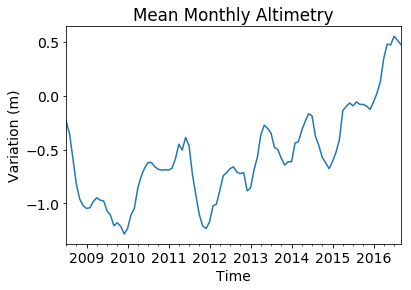

In [7]:
df["lake_height"].resample("M").mean().plot(); plt.title("Mean Monthly Altimetry"); plt.ylabel("Variation (m)")

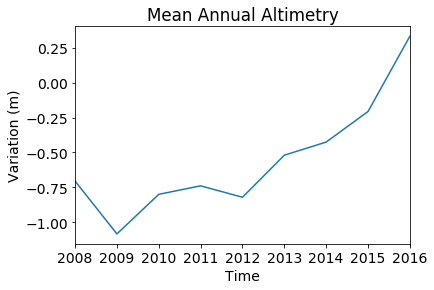

In [8]:
df["lake_height"].resample("A").mean().plot(); plt.title("Mean Annual Altimetry"); plt.ylabel("Variation (m)")

## MODIS data

In [9]:
"""import scipy.io
mat = scipy.io.loadmat('/home2/svimal/Github/Nina/data/lake_610/ts_GLWD1_241_h22v04.mat')
print mat.keys()
import numpy as np
np.shape(mat["miss_ts"].T), np.shape(mat["ts_water"])
miss_ts = np.squeeze(mat["miss_ts"].T)
ts_water = np.squeeze(mat["ts_water"])
miss_ts[0:3], ts_water[0:3]
#mat["miss_ts"][0][0:5], mat["ts_water"][0:5]"""

'import scipy.io\nmat = scipy.io.loadmat(\'/home2/svimal/Github/Nina/data/lake_610/ts_GLWD1_241_h22v04.mat\')\nprint mat.keys()\nimport numpy as np\nnp.shape(mat["miss_ts"].T), np.shape(mat["ts_water"])\nmiss_ts = np.squeeze(mat["miss_ts"].T)\nts_water = np.squeeze(mat["ts_water"])\nmiss_ts[0:3], ts_water[0:3]\n#mat["miss_ts"][0][0:5], mat["ts_water"][0:5]'

# This part has to be corrected with actual dates. 
## But in the meanwhile, I am assuming the dates are equally spaced at 10 days to somewhat match the area array length
## One other way to do it would be to look at the number of images per month and interpolating inbetween, that would improve the accuracy much, but its better to use the actual dates

DatetimeIndex(['1993-01-01', '1993-01-11', '1993-01-21', '1993-01-31',
               '1993-02-10', '1993-02-20', '1993-03-02', '1993-03-12',
               '1993-03-22', '1993-04-01',
               ...
               '2013-10-13', '2013-10-23', '2013-11-02', '2013-11-12',
               '2013-11-22', '2013-12-02', '2013-12-12', '2013-12-22',
               '2014-01-01', '2014-01-11'],
              dtype='datetime64[ns]', length=769, freq='10D')
0    1993100.0
Name: Dates, dtype: float64 768    2014100.0
Name: Dates, dtype: float64
                Dates  Area
1993-01-01  1993100.0   0.0
1993-01-11  1993100.0   0.0


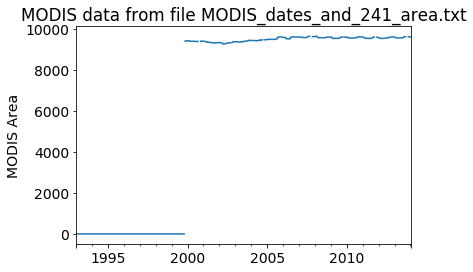

In [10]:
df_modis = pd.read_csv(MODIS, names=["Dates", "Area"], sep="\t",engine='python', index_col=False)
#print df_modis.Dates.head(10),df_modis.Dates.tail(10) 

print pd.date_range('1993-01-01', periods=len(df_modis), freq='10D')
print df_modis.Dates.head(1), df_modis.Dates.tail(1)
df_modis.index = pd.date_range('1993-01-01', periods=len(df_modis), freq='10D')
print df_modis.head(2)
df_modis.Area.plot(); plt.title("MODIS data from file " +str(MODIS).split("/")[-1]); plt.ylabel("MODIS Area")

# Create subsets of both vectors (altimetry and surface area) for the overlapping period

In [11]:
df_glrm_daily = df["lake_height"].resample("D").mean().interpolate()
df_modis_daily = df_modis["Area"].resample("D").mean().interpolate()
start = max(df_glrm_daily.index[0], df_modis_daily.index[0])
end =  min(df_glrm_daily.index[-1],  df_modis_daily.index[-1])
print start, end
df_glrm_subset = df_glrm_daily[(df_glrm_daily.index >= start) & (df_glrm_daily.index <= end)]
df_modis_subset = df_modis_daily[(df_modis_daily.index >= start) & (df_modis_daily.index <= end)]
print len(df_glrm_subset), len(df_modis_subset)

2008-07-16 00:00:00 2014-01-11 00:00:00
2006 2006


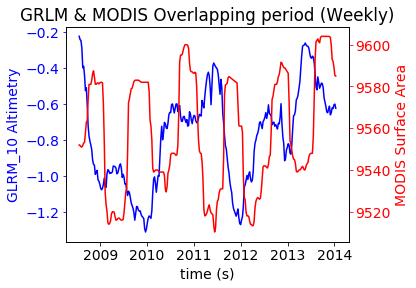

In [12]:
fig, ax1 = plt.subplots()
t = df_glrm_subset.resample("W").mean().interpolate().index
s1 = df_glrm_subset.resample("W").mean().interpolate().tolist()
ax1.plot(t, s1, 'b-'); ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('GLRM_10 Altimetry', color='b')
ax1.tick_params('y', colors='b'); ax2 = ax1.twinx()
s2 = df_modis_subset.resample("W").mean().interpolate().tolist()
ax2.plot(t, s2, 'r-'); ax2.set_ylabel('MODIS Surface Area', color='r')
ax2.tick_params('y', colors='r'); fig.tight_layout(); plt.title( "GRLM & MODIS Overlapping period (Weekly)"); plt.show()

# Observations:
Clearly from the above plot, we can see that the minima around 2011 and 2012 should perhaps correspond to the same time, so the correlation would improve if we use the actual dates. The general trend seems to be correlated well. 

# Compute correlation coefficient (on weekly mean values) 

In [13]:
cor = numpy.corrcoef(df_glrm_subset.resample("W").mean().interpolate().tolist(), 
                     df_modis_subset.resample("W").mean().interpolate().tolist())
print "correlation coefficient is: " , cor[0][1]

correlation coefficient is:  -0.0948050260163


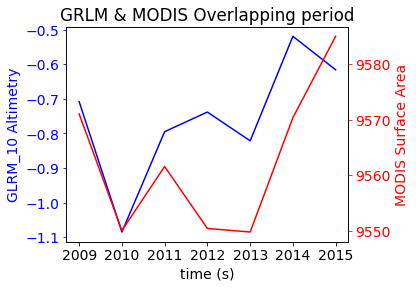

In [19]:
fig, ax1 = plt.subplots()
t = df_glrm_subset.resample("A").mean().interpolate().index
s1 = df_glrm_subset.resample("A").mean().interpolate().tolist()
ax1.plot(t, s1, 'b-'); ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('GLRM_10 Altimetry', color='b')
ax1.tick_params('y', colors='b'); ax2 = ax1.twinx()
s2 = df_modis_subset.resample("A").mean().interpolate().tolist()
ax2.plot(t, s2, 'r-'); ax2.set_ylabel('MODIS Surface Area', color='r')
ax2.tick_params('y', colors='r'); fig.tight_layout(); plt.title( "GRLM & MODIS Overlapping period"); plt.show()

# Compute correlation coefficient (on Annual mean values) 

In [20]:
cor = numpy.corrcoef(df_glrm_subset.resample("A").mean().interpolate().tolist(), 
                     df_modis_subset.resample("A").mean().interpolate().tolist())
print("correlation coefficient is: " , cor[0][1])

('correlation coefficient is: ', 0.69795611829587256)


# Calculate volume change over time

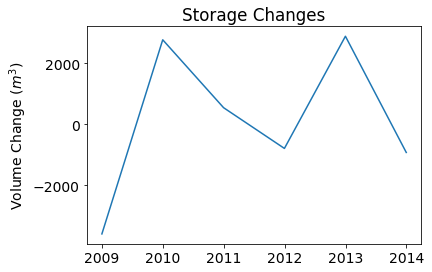

In [39]:
storage_changes = []
for i in range(len(s1)-1):
    del_height = s1[i+1]-s1[i]
    avg_area = (s2[i+1] + s2[i])/2
    storage_change = del_height*avg_area
    storage_changes.append(storage_change)
plt.plot(t[0:-1], storage_changes); plt.title("Storage Changes"); plt.ylabel("Volume Change (${m^3}$)")